In [31]:

script_start_time = time()
println("\nimporting packages...")

using Pkg
using Statistics
using LinearAlgebra
using Eirene
using StatsBase
using JLD
using Plots
Pkg.add("ColorSchemes")
using ColorSchemes
using JSON
using DataFrames
using MAT
using StatsPlots
using CSV


include("helper_functions.jl")
println("packages and functions imported")
printstyled("Elapsed time = $(time() - script_start_time) seconds \n \n", color = :yellow)


importing packages...
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.2/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


packages and functions imported
Elapsed time = 17.100553035736084 seconds 
 


In [4]:
## Load in csv

traits = CSV.read("../data/HCP/unrelated100subjects_behavior.csv")

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count
,Int64,String,String,String,String,Bool,Int64,Int64
1,100307,Q1,Q01,F,26-30,1,1,1
2,100408,Q3,Q03,M,31-35,1,1,1
3,101107,S500,Q06,M,22-25,1,2,2
4,101309,S500,Q06,M,26-30,1,1,1
5,101915,Q3,Q04,F,31-35,1,2,2
6,103111,S500,Q06,M,26-30,1,1,1
7,103414,Q2,Q02,F,22-25,1,1,1
8,103818,Q1,Q01,F,31-35,1,2,2
9,105014,S500,Q05,F,26-30,1,2,2


In [26]:
# Read in graph files

dsi_array = load("../processed_data/graphs/70nodes/dsi_matrices_091720_graphs.jld", "weighted_graph_array")
pids = matread("../data/HCP/dsi_matrices.mat")["sbj_id"]
pids = dropdims(parse.(Int64, pids), dims=2)

100-element Array{Int64,1}:
 100307
 100408
 101107
 101309
 101915
 103111
 103414
 103818
 105014
 105115
 106016
 108828
 110411
      ⋮
 366446
 397760
 414229
 499566
 654754
 672756
 751348
 756055
 792564
 856766
 857263
 899885

In [20]:
unique(pids .== traits[!,"Subject"])

1-element Array{Bool,1}:
 1

In [22]:
# Load in betti bar results

betti_bars = bettiBar_dict = load("../processed_data/results/70nodes/randomGeom_70nodes_100reps_3_091720_thresh06_edge1449_noiseOnly_bettiBars.jld", "bettiBarArray")


100×4 Array{Float64,2}:
 56668.0  113149.0  32261.0   773.0
 53856.0  134788.0  17622.0   107.0
 54917.0   79823.0  31730.0     0.0
 51612.0  108323.0  26462.0     0.0
 51942.0  118180.0  41283.0   178.0
 49904.0   96189.0  37733.0  1611.0
 49577.0   85354.0  36578.0     0.0
 41404.0  121079.0  46513.0   342.0
 44411.0  113588.0  42161.0     3.0
 60778.0   89527.0  59714.0     0.0
 51405.0  100826.0  40020.0   353.0
 63117.0  133662.0  30481.0     0.0
 44935.0   99651.0  46392.0    69.0
     ⋮                             
 44250.0   94179.0  75104.0   240.0
 59290.0  111224.0  61178.0     0.0
 56149.0  102518.0  33339.0    16.0
 51507.0  135575.0  46740.0   294.0
 59630.0  120437.0  39078.0     0.0
 43532.0  119440.0  38310.0     0.0
 66460.0  146847.0  13300.0     0.0
 52929.0  110427.0  50299.0     0.0
 46323.0  109172.0  40924.0    76.0
 62168.0  157497.0  10225.0     0.0
 56600.0  102214.0  53118.0   114.0
 47399.0  118361.0  63782.0    11.0

In [30]:
# Plot to see if any relation

df = DataFrame(bbar1 = betti_bars[:,1], Subject = pids)

# Join
big_df = innerjoin(df,traits, on=:Subject)

,bbar1,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count
,Float64,Int64,String,String,String,String,Bool,Int64
1,56668.0,100307,Q1,Q01,F,26-30,1,1
2,53856.0,100408,Q3,Q03,M,31-35,1,1
3,54917.0,101107,S500,Q06,M,22-25,1,2
4,51612.0,101309,S500,Q06,M,26-30,1,1
5,51942.0,101915,Q3,Q04,F,31-35,1,2
6,49904.0,103111,S500,Q06,M,26-30,1,1
7,49577.0,103414,Q2,Q02,F,22-25,1,1
8,41404.0,103818,Q1,Q01,F,31-35,1,2
9,44411.0,105014,S500,Q05,F,26-30,1,2


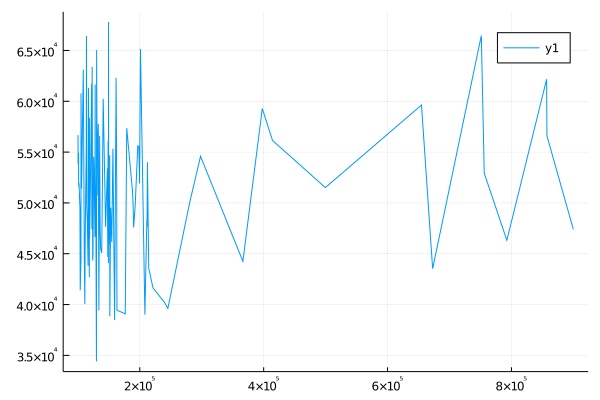

In [34]:
@df big_df plot(
    :Subject,
    :bbar1
)

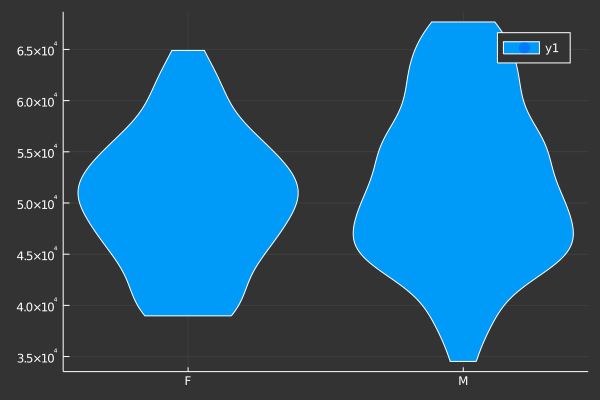

In [37]:
@df big_df violin(:Gender,:bbar1,marker=(0.2,:blue,stroke(0)), bg = RGB(0.2, 0.2, 0.2))

In [39]:
cor(big_df.Gender,big_df.bbar1)

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::DataValues.DataValue{T1}, ::T2) where {T1, T2} at /opt/julia/packages/DataValues/N7oeL/src/scalar/operations.jl:66
  +(::T1, !Matched::DataValues.DataValue{T2}) where {T1, T2} at /opt/julia/packages/DataValues/N7oeL/src/scalar/operations.jl:76